In [6]:
%load_ext autoreload
%autoreload 2

import torch
from InstanSeg.utils.create_bioimageio_model import export_bioimageio
from aicsimageio import AICSImage
from InstanSeg.utils.utils import show_images

import os
os.environ["INSTANSEG_MODEL_PATH"] = str(os.path.abspath("../InstanSeg/models/"))
os.environ["INSTANSEG_TORCHSCRIPT_PATH"] = str(os.path.abspath("../InstanSeg/torchscripts/"))
os.environ["INSTANSEG_BIOIMAGEIO_PATH"] = str(os.path.abspath("../InstanSeg/bioimageio_models/"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


No best_params.csv found in model folder, using default parameters
Generating InstanSeg_UNet


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


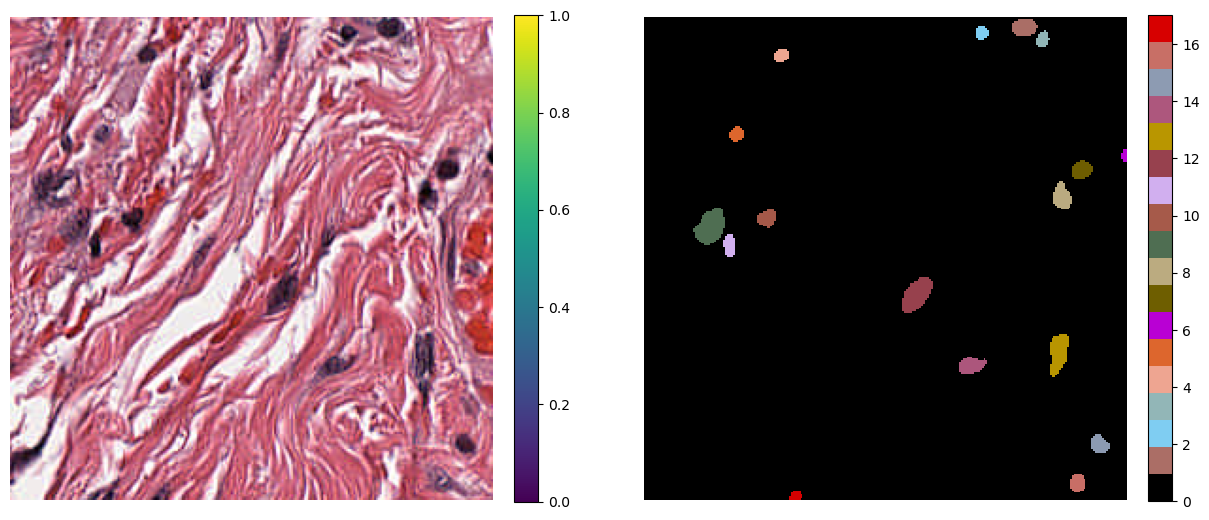

/home/thibaut_goldsborough/micromamba/envs/instanseg/lib/python3.9/site-packages/torch/jit/_script.py:1277: UserWarning: `optimize` is deprecated and has no effect. Use `with torch.jit.optimized_execution() instead
  warnings.warn(


Saved torchscript model to ../torchscripts/1821767.pt
Model pixel size:  0.5
Generating InstanSeg_UNet
Requesting default device: cuda
Pixel size was found in the metadata, pixel size is set to:  0.499000003992
0 3
Input tensor shape:  torch.Size([1, 3, 256, 256])
dict_keys(['data_path', 'dataset', 'source_dataset', 'model_folder', 'model_path', 'output_path', 'experiment_str', 'experiment_folder', 'batch_size', 'num_epochs', 'lr', 'model_str', 'save', 'device', 'loss_function', 'n_sigma', 'on_cluster', 'weight', 'layers', 'data_slice', 'clip', 'weight_decay', 'dropprob', 'transform_intensity', 'dim_in', 'dummy', 'to_centre', 'multi_centre', 'num_workers', 'open_license', 'image_modality', 'length_of_epoch', 'binary_loss_fn', 'seed_loss_fn', 'cosineannealing', 'channel_invariant', 'requested_pixel_size', 'target_segmentation', 'optimize_hyperparameters', 'hotstart_training', 'window_size', 'dim_coords', 'norm', 'mlp_width', 'feature_engineering', 'augmentation_type', 'adaptor_net_str',

/home/thibaut_goldsborough/micromamba/envs/instanseg/lib/python3.9/site-packages/bioimageio/spec/shared/schema.py:46: ValidationWarning: tags: Missing tags corresponding to bioimage.io categories: [{'modality': ['electron-microscopy', 'cryo-electron-microscopy', 'fluorescence-light-microscopy', 'transmission-light-microscopy', 'super-resolution-microscopy', 'x-ray-microscopy', 'force-microscopy', 'high-content-imaging', 'whole-slide-imaging', 'other']}, {'dims': ['2d', '3d', '2d-t', '3d-t']}, {'content': ['cells', 'nuclei', 'extracellular-vesicles', 'tissue', 'plant', 'mitochondria', 'vasculature', 'cell-membrane', 'brain', 'whole-organism']}, {'framework': ['tensorflow', 'pytorch', 'tensorflow.js']}, {'software': ['ilastik', 'imagej', 'fiji', 'imjoy', 'deepimagej', 'napari']}, {'method': ['stardist', 'cellpose', 'yolo', 'care', 'n2v', 'denoiseg']}, {'network': ['unet', 'densenet', 'resnet', 'inception', 'shufflenet']}, {'task': ['semantic-segmentation', 'instance-segmentation', 'objec

In [7]:
from InstanSeg.utils.utils import export_to_torchscript

model_name = "1821767"

export_to_torchscript(model_name, show_example=True)

instanseg = torch.jit.load("../InstanSeg/torchscripts/"+ model_name + ".pt")

export_bioimageio(instanseg, 
                model_name = model_name,
                test_img_path = "../InstanSeg/examples/HE_example.tif",
            )

